In [15]:
# Importing the Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np
import scipy.stats as stats



In [16]:
# Reading the Files

Customers=pd.read_csv("cleaned_customers.csv")
Order_Details=pd.read_csv("cleaned_order_details.csv")
Orders=pd.read_csv("cleaned_orders.csv")
Payments=pd.read_csv("cleaned_payments.csv")
Products=pd.read_csv("cleaned_products.csv")


In [17]:
# Exploring the Tables

#Customers
print(Customers.head())

# Order_Details
print(Order_Details.head())

# Orders
print(Orders.head())

# Payments
print(Payments.head())

# Products
print(Products.head())

   Customer_Id      Customer_Name  Gender  Age              Location  \
0            1  Christopher Lopez    Male   45      Lake Williamview   
1            2    Lawrence Benson    Male   40          North Robert   
2            3     Allison Nguyen    Male   58  New Alexanderchester   
3            4      Sean Alvarado  Female   61      West Raymondview   
4            5       Robert Brown    Male   44              Josetown   

  Customer_Join_Date  Customer_Join_Year Loyalty_Status  
0          5/17/2022                2022         Silver  
1          7/18/2022                2022         Bronze  
2         12/16/2018                2018           Gold  
3          3/27/2018                2018         Silver  
4          1/17/2018                2018         Silver  
   Order_Detail_Id  Order_Id  Product_Id  Quantity Unit_Price  Discount  \
0                1     75616        3490         3   $175.93       0.20   
1                2     51821        2476         3   $493.57       0.

In [18]:
# Join Orders with Customers
Orders_Customers=pd.merge(Orders,Customers,on ="Customer_Id",how="left")

# Join with Order Details
Order_full=pd.merge(Orders_Customers,Order_Details,on="Order_Id",how="left")

# Join with Products
Order_full=pd.merge(Order_full,Products,on="Product_Id",how="left")

# Join with Payments
Order_full=pd.merge(Order_full,Payments,on="Payment_Id",how="left")

print(Order_full.head())


   Order_Id_x  Customer_Id Order_Date   Order_Week Order_Month  Order_Year  \
0           1         6913  7/31/2022   Fifth Week        July        2022   
1           2         3884   9/8/2020  Second Week   September        2020   
2           3        13859  10/6/2021   First Week     October        2021   
3           4        11860  10/9/2020  Second Week     October        2020   
4           5         3848  1/23/2021  Fourth Week     January        2021   

  Order_Status  Payment_Id   Customer_Name  Gender  ...  Category  \
0     Returned           1   Eugene Foster  Female  ...  Clothing   
1      Pending           2    Alexis Jones    Male  ...    Sports   
2      Pending           3      John Solis  Female  ...    Beauty   
3    Cancelled           4    Marc Hensley    Male  ...    Beauty   
4    Completed           5  Amanda Mullins    Male  ...    Sports   

  Sub_Category     Brand   Price Stock_Quantity  Order_Id_y  Payment_Method  \
0        Women  Brand 10  201.66     

In [19]:
# Dropped Duplicate Column
Order_full.drop("Order_Id_y",axis=1,inplace=True)
print(Order_full.head())

   Order_Id_x  Customer_Id Order_Date   Order_Week Order_Month  Order_Year  \
0           1         6913  7/31/2022   Fifth Week        July        2022   
1           2         3884   9/8/2020  Second Week   September        2020   
2           3        13859  10/6/2021   First Week     October        2021   
3           4        11860  10/9/2020  Second Week     October        2020   
4           5         3848  1/23/2021  Fourth Week     January        2021   

  Order_Status  Payment_Id   Customer_Name  Gender  ...  Product_Name  \
0     Returned           1   Eugene Foster  Female  ...   Product 206   
1      Pending           2    Alexis Jones    Male  ...  Product 1862   
2      Pending           3      John Solis  Female  ...  Product 1355   
3    Cancelled           4    Marc Hensley    Male  ...  Product 1100   
4    Completed           5  Amanda Mullins    Male  ...   Product 238   

   Category Sub_Category     Brand   Price  Stock_Quantity  Payment_Method  \
0  Clothing   

In [20]:
#Renaming the Column
Order_full.rename(columns={"Order_Id_x":"Order_Id"},inplace=True)
print(Order_full.head())

   Order_Id  Customer_Id Order_Date   Order_Week Order_Month  Order_Year  \
0         1         6913  7/31/2022   Fifth Week        July        2022   
1         2         3884   9/8/2020  Second Week   September        2020   
2         3        13859  10/6/2021   First Week     October        2021   
3         4        11860  10/9/2020  Second Week     October        2020   
4         5         3848  1/23/2021  Fourth Week     January        2021   

  Order_Status  Payment_Id   Customer_Name  Gender  ...  Product_Name  \
0     Returned           1   Eugene Foster  Female  ...   Product 206   
1      Pending           2    Alexis Jones    Male  ...  Product 1862   
2      Pending           3      John Solis  Female  ...  Product 1355   
3    Cancelled           4    Marc Hensley    Male  ...  Product 1100   
4    Completed           5  Amanda Mullins    Male  ...   Product 238   

   Category Sub_Category     Brand   Price  Stock_Quantity  Payment_Method  \
0  Clothing        Women  

In [21]:
# Dropping the Duplicate
Order_full.drop_duplicates(inplace=True)
print(Order_full.head())
print(f"Total Rows: {len(Order_full)}")

   Order_Id  Customer_Id Order_Date   Order_Week Order_Month  Order_Year  \
0         1         6913  7/31/2022   Fifth Week        July        2022   
1         2         3884   9/8/2020  Second Week   September        2020   
2         3        13859  10/6/2021   First Week     October        2021   
3         4        11860  10/9/2020  Second Week     October        2020   
4         5         3848  1/23/2021  Fourth Week     January        2021   

  Order_Status  Payment_Id   Customer_Name  Gender  ...  Product_Name  \
0     Returned           1   Eugene Foster  Female  ...   Product 206   
1      Pending           2    Alexis Jones    Male  ...  Product 1862   
2      Pending           3      John Solis  Female  ...  Product 1355   
3    Cancelled           4    Marc Hensley    Male  ...  Product 1100   
4    Completed           5  Amanda Mullins    Male  ...   Product 238   

   Category Sub_Category     Brand   Price  Stock_Quantity  Payment_Method  \
0  Clothing        Women  

In [22]:
# Filling the Age and Total Amount Column with the Mean Value

x=Order_full["Age"].mean()
Order_full.fillna({"Age":x},inplace=True)

y=Order_full["Total_Amount"].mean()
Order_full.fillna({"Total_Amount":y},inplace=True)

print(Order_full.head())



   Order_Id  Customer_Id Order_Date   Order_Week Order_Month  Order_Year  \
0         1         6913  7/31/2022   Fifth Week        July        2022   
1         2         3884   9/8/2020  Second Week   September        2020   
2         3        13859  10/6/2021   First Week     October        2021   
3         4        11860  10/9/2020  Second Week     October        2020   
4         5         3848  1/23/2021  Fourth Week     January        2021   

  Order_Status  Payment_Id   Customer_Name  Gender  ...  Product_Name  \
0     Returned           1   Eugene Foster  Female  ...   Product 206   
1      Pending           2    Alexis Jones    Male  ...  Product 1862   
2      Pending           3      John Solis  Female  ...  Product 1355   
3    Cancelled           4    Marc Hensley    Male  ...  Product 1100   
4    Completed           5  Amanda Mullins    Male  ...   Product 238   

   Category Sub_Category     Brand   Price  Stock_Quantity  Payment_Method  \
0  Clothing        Women  

In [23]:
# Dropping the Null Values
Order_full.dropna(inplace=True)
print(Order_full.head())
print(f"Total Rows: {len(Order_full)}")

   Order_Id  Customer_Id Order_Date   Order_Week Order_Month  Order_Year  \
0         1         6913  7/31/2022   Fifth Week        July        2022   
1         2         3884   9/8/2020  Second Week   September        2020   
2         3        13859  10/6/2021   First Week     October        2021   
3         4        11860  10/9/2020  Second Week     October        2020   
4         5         3848  1/23/2021  Fourth Week     January        2021   

  Order_Status  Payment_Id   Customer_Name  Gender  ...  Product_Name  \
0     Returned           1   Eugene Foster  Female  ...   Product 206   
1      Pending           2    Alexis Jones    Male  ...  Product 1862   
2      Pending           3      John Solis  Female  ...  Product 1355   
3    Cancelled           4    Marc Hensley    Male  ...  Product 1100   
4    Completed           5  Amanda Mullins    Male  ...   Product 238   

   Category Sub_Category     Brand   Price  Stock_Quantity  Payment_Method  \
0  Clothing        Women  

In [24]:
# Correcting the Date Format
Order_full["Order_Date"]=pd.to_datetime(Order_full["Order_Date"],format="mixed")
Order_full["Payment_Date"]=pd.to_datetime(Order_full["Payment_Date"],format="mixed")
Order_full["Customer_Join_Date"]=pd.to_datetime(Order_full["Customer_Join_Date"],format="mixed")
print(Order_full.head())

   Order_Id  Customer_Id Order_Date   Order_Week Order_Month  Order_Year  \
0         1         6913 2022-07-31   Fifth Week        July        2022   
1         2         3884 2020-09-08  Second Week   September        2020   
2         3        13859 2021-10-06   First Week     October        2021   
3         4        11860 2020-10-09  Second Week     October        2020   
4         5         3848 2021-01-23  Fourth Week     January        2021   

  Order_Status  Payment_Id   Customer_Name  Gender  ...  Product_Name  \
0     Returned           1   Eugene Foster  Female  ...   Product 206   
1      Pending           2    Alexis Jones    Male  ...  Product 1862   
2      Pending           3      John Solis  Female  ...  Product 1355   
3    Cancelled           4    Marc Hensley    Male  ...  Product 1100   
4    Completed           5  Amanda Mullins    Male  ...   Product 238   

   Category Sub_Category     Brand   Price  Stock_Quantity  Payment_Method  \
0  Clothing        Women  

In [25]:
# Describe the value
print(Order_full[["Age","Total_Amount","Amount_Paid","Stock_Quantity"]].describe())

                 Age   Total_Amount    Amount_Paid  Stock_Quantity
count  200000.000000  200000.000000  200000.000000   200000.000000
mean       44.206045     576.427864     502.811796      506.835515
std        15.382608     440.336647     285.128407      289.246419
min        18.000000       4.050000      10.010000        0.000000
25%        31.000000     227.057500     257.107500      257.000000
50%        44.000000     446.630000     500.750000      507.000000
75%        58.000000     842.520000     749.972500      758.000000
max        70.000000    1999.280000     999.990000      999.000000


In [26]:
# Statistics Result

# Mean
print(f"1. Average of Age: {statistics.mean(Order_full["Age"])}")
print(f"2. Average of Total Amount: {statistics.mean(Order_full["Total_Amount"])}")
print(f"3. Average of Amount Paid: {statistics.mean(Order_full["Amount_Paid"])}")
print(f"4. Average of Stock Quantity: {statistics.mean(Order_full["Stock_Quantity"])}")

# Median
print(f"5. Median of Age: {statistics.median(Order_full["Age"])}")
print(f"6. Median of Total Amount: {statistics.median(Order_full["Total_Amount"])}")
print(f"7. Median of Amount Paid: {statistics.median(Order_full["Amount_Paid"])}")
print(f"8. Median of Stock Quantity: {statistics.median(Order_full["Stock_Quantity"])}")

# Mode
print(f"9. Mode of Age: {statistics.mode(Order_full["Age"])}")
print(f"10. Mode of Total Amount: {statistics.mode(Order_full["Total_Amount"])}")
print(f"11. Mode of Amount Paid: {statistics.mode(Order_full["Amount_Paid"])}")
print(f"12. Mode of Stock Quantity: {statistics.mode(Order_full["Stock_Quantity"])}")

# Standard Deviation
print(f"13. Standard Deviation of Age: {statistics.stdev(Order_full["Age"])}")
print(f"14. Standard Deviation of Total Amount: {statistics.stdev(Order_full["Total_Amount"])}")
print(f"15. Standard Deviation of Amount Paid: {statistics.stdev(Order_full["Amount_Paid"])}")
print(f"16. Standard Deviation of Stock Quantity: {statistics.stdev(Order_full["Stock_Quantity"])}")

# Variance
print(f"17. Variance of Age: {statistics.variance(Order_full['Age'])}")
print(f"18. Variance of Total Amount: {statistics.variance(Order_full['Total_Amount'])}")
print(f"19. Variance of Amount Paid: {statistics.variance(Order_full['Amount_Paid'])}")
print(f"20. Variance of Stock Quantity: {statistics.variance(Order_full['Stock_Quantity'])}")


# Findings & Observations:
# Average customer age is ~44 with mode at 65, indicating many older customers.
# Total amount shows high variability (mean 576 > median 446), suggesting right-skewed spending with some outliers.
# Amount paid is more balanced (mean ~503, median ~501), showing consistent payment patterns.
# Stock quantity distribution is stable (mean ~507, median 507) but mode 996 shows common stock level.
# High standard deviation in total amount indicates large differences in customer spending.
# Overall, age is stable, payments are consistent, but spending and stock show higher variation.


1. Average of Age: 44.206045
2. Average of Total Amount: 576.42786405
3. Average of Amount Paid: 502.8117955
4. Average of Stock Quantity: 506.835515
5. Median of Age: 44.0
6. Median of Total Amount: 446.63
7. Median of Amount Paid: 500.75
8. Median of Stock Quantity: 507.0
9. Mode of Age: 65
10. Mode of Total Amount: 98.05
11. Mode of Amount Paid: 674.07
12. Mode of Stock Quantity: 996.0
13. Standard Deviation of Age: 15.382608152752995
14. Standard Deviation of Total Amount: 440.33664715732937
15. Standard Deviation of Amount Paid: 285.1284068770248
16. Standard Deviation of Stock Quantity: 289.2464186245669
17. Variance of Age: 236.62463358114292
18. Variance of Total Amount: 193896.36282975838
19. Variance of Amount Paid: 81298.20840823022
20. Variance of Stock Quantity: 83663.49068713821


In [27]:
# Aggregate Values using Statistics:

print(f"1. Total Number of Customers: {len(Order_full["Customer_Id"])}")
print(f"2. Total Number of Orders: {len(Order_full["Order_Id"])}")
print(f"3. Total Number of Products: {len(Order_full["Product_Id"])}")

print(f"4. Total Billed Amount: {sum(Order_full["Total_Amount"])}")
print(f"5. Total Amount Paid: {sum(Order_full["Amount_Paid"])}")
print(f"6. Total Stock Quantity: {sum(Order_full["Stock_Quantity"])}")

print(f"7. Minimum Age of the Customer: {min(Order_full["Age"])}")
print(f"8. Maximum Age of the Customer: {max(Order_full["Age"])}")

print(f"9. Minimum Total Amount: {min(Order_full["Total_Amount"])}")
print(f"10. Maximum Total Amount: {max(Order_full["Total_Amount"])}")

print(f"11. Minimum Amount Paid: {min(Order_full["Amount_Paid"])}")
print(f"12. Maximum Amount Paid: {max(Order_full["Amount_Paid"])}")

print(f"13. Minimum Stock Quantity: {min(Order_full["Stock_Quantity"])}")
print(f"14. Maximum Stock Quantity: {max(Order_full["Stock_Quantity"])}")


# Findings & Observations:
# Dataset contains 200,000 customers, orders, and products, indicating a large-scale dataset.
# Total billed amount (~115M) is higher than total paid (~100M), showing ~13% pending payments.
# Customer ages range from 18 to 70, covering both young and senior segments.
# Order amounts vary widely (₹4 to ~₹1999), suggesting diverse purchase behaviors.
# Amount paid ranges from ₹10 to ~₹1000, showing capped payments compared to billed amounts.
# Stock levels vary from 0 to 999, with significant fluctuation in product availability.


1. Total Number of Customers: 200000
2. Total Number of Orders: 200000
3. Total Number of Products: 200000
4. Total Billed Amount: 115285572.81
5. Total Amount Paid: 100562359.1
6. Total Stock Quantity: 101367103.0
7. Minimum Age of the Customer: 18
8. Maximum Age of the Customer: 70
9. Minimum Total Amount: 4.05
10. Maximum Total Amount: 1999.28
11. Minimum Amount Paid: 10.01
12. Maximum Amount Paid: 999.99
13. Minimum Stock Quantity: 0.0
14. Maximum Stock Quantity: 999.0


In [44]:
# Top 10 Sub-Category by Sales

products=Order_full.groupby("Sub_Category")["Amount_Paid"].sum()
Top_10_products=products.sort_values(ascending=False).head(10)

print(Top_10_products)

# Findings & Observations:
# Kitchen products recorded the highest sales, crossing 7.5M.
# Women’s products and Laptops/Mobiles follow closely, showing strong demand.
# Makeup, Decor, Fitness, and Haircare also contribute significantly.
# Accessories and Equipment round out the list, showing balanced category spread.


Sub_Category
Kitchen        7516666.68
Women          7303993.69
Laptops        6894082.27
Mobiles        6883476.25
Makeup         6872695.02
Decor          6833816.76
Fitness        6823897.67
Haircare       6764057.36
Equipment      6742230.91
Accessories    6726850.60
Name: Amount_Paid, dtype: float64


In [29]:
# Orders from Top 7 Location

location=Order_full.groupby("Location")["Order_Id"].count()
Top_7_Location=location.sort_values(ascending=False).head(7)

print(Top_7_Location)

# Findings & Observations:
# Lake Michael leads with the highest number of orders (226), making it a key market location.
# North James (199) and East Michael (187) follow closely, indicating strong customer activity there.
# North Joseph (172) and North Michael (172) have equal order counts, showing balanced demand.
# North Jennifer (166) also contributes significantly, while West Michael (156) records the least among top 7.
# The order distribution is fairly spread out, but Lake Michael stands out as the top-performing location.
# These insights can guide targeted marketing and inventory allocation strategies.


Location
Lake Michael      226
North James       199
East Michael      187
North Joseph      172
North Michael     172
North Jennifer    166
West Michael      156
Name: Order_Id, dtype: int64


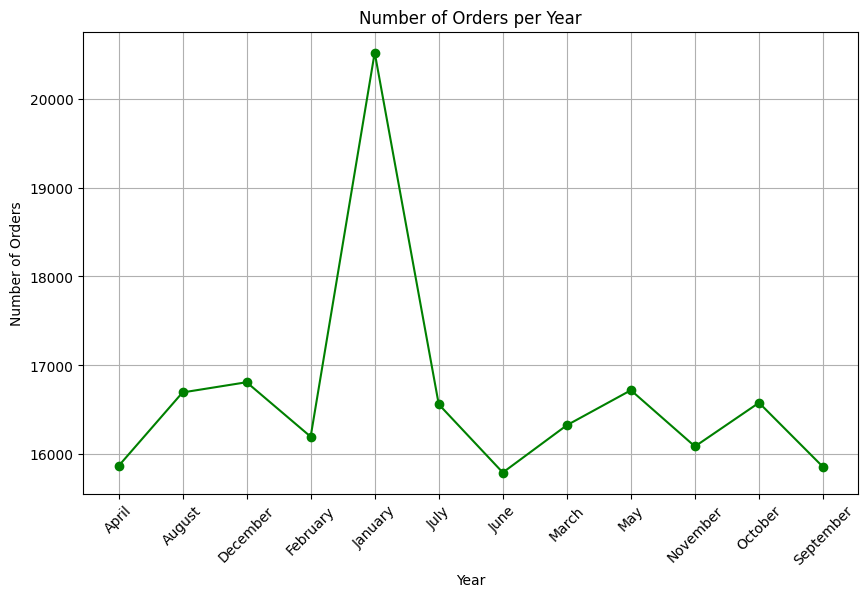

In [30]:
# Number of Orders per Year

Orders_Per_Year=Order_full.groupby("Order_Month")["Order_Id"].count()

plt.figure(figsize=(10,6))
plt.plot(Orders_Per_Year.index,Orders_Per_Year,color="green",marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Year")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Findings & Observations:
# Orders peak in January due to festive/New Year demand (~20,500 orders).
# Lowest sales occur in June and September (~15,800 orders), showing seasonal slowdown.
# Most other months remain stable between 16,000–17,000 orders.
# Businesses should leverage January highs and boost promotions in low-sales months.

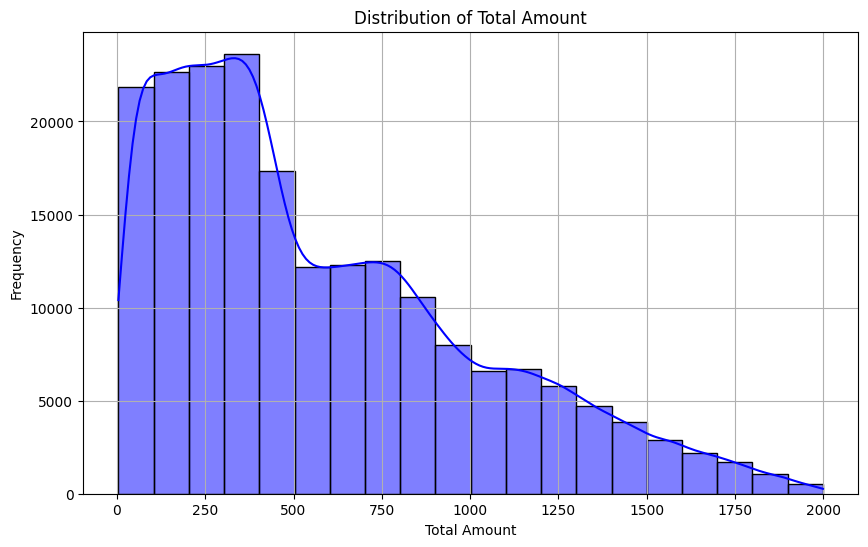

In [31]:
# Distribution of Total Amount

plt.figure(figsize=(10,6))
sns.histplot(Order_full["Total_Amount"],bins=20,kde=True,color="blue")

plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Total Amount")
plt.grid(True)
plt.show()

# Findings & Observations:
# The distribution of Total Amount is right-skewed, with most transactions below 500.
# Very high-value transactions (above 1000) are rare and occur less frequently.
# Majority of orders are concentrated in the lower range, indicating smaller purchases dominate.
# Businesses could explore upselling strategies to increase average order value.


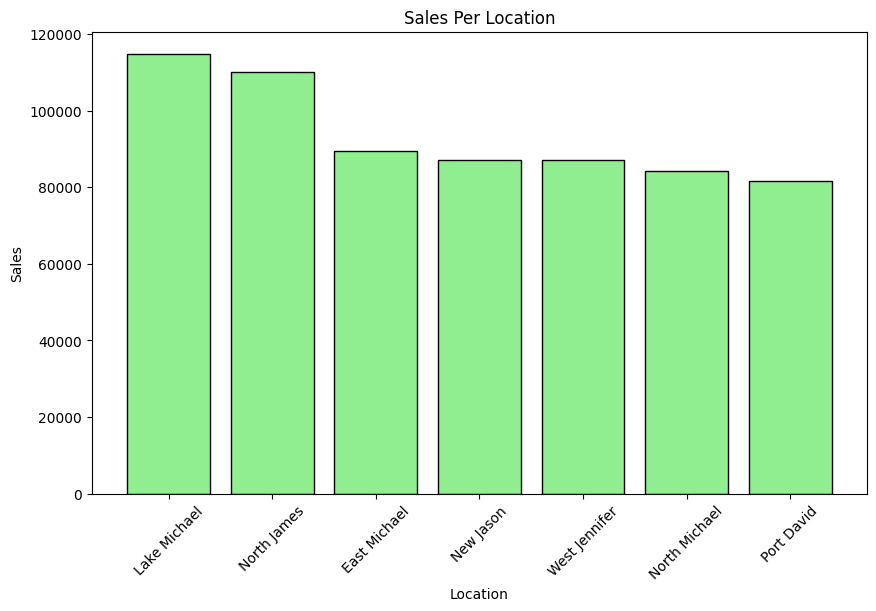

In [32]:
# Sales Analysis by Top Locations

Sales_Per_Location=Order_full.groupby("Location")["Amount_Paid"].sum()
Top_7_Location=Sales_Per_Location.sort_values(ascending=False).head(7)

plt.figure(figsize=(10,6))
plt.bar(Top_7_Location.index,Top_7_Location,color="lightgreen",edgecolor="black")
plt.xlabel("Location")
plt.ylabel("Sales")
plt.title("Sales Per Location")
plt.xticks(rotation=45)
plt.show()

# Findings & Observations:
# Lake Michael and North James generate the highest sales, crossing 110K each.
# Port David records the lowest sales (~81K) among the top 7 locations.
# Sales across locations are fairly balanced, with a gradual decline after the top two.
# Focused promotions in lower-performing locations could help improve overall sales.

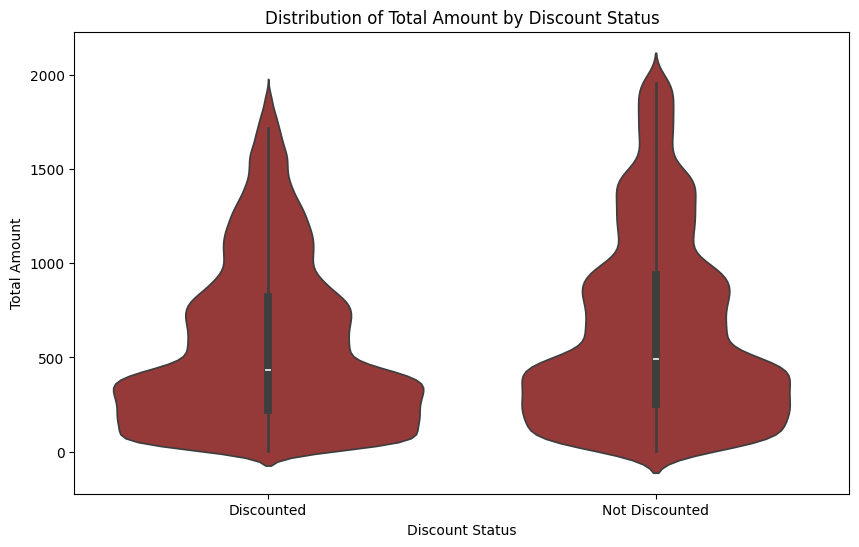

In [33]:
# Impact of Discounts on Total Amount

plt.figure(figsize=(10,6))

sns.violinplot(x="Discount_Status",y="Total_Amount",data=Order_full,color="brown")

plt.xlabel("Discount Status")
plt.ylabel("Total Amount")
plt.title("Distribution of Total Amount by Discount Status")
plt.show()

# Findings & Observations:
# Both discounted and non-discounted orders show similar spread in total amount.
# Median purchase amount is slightly higher for non-discounted orders.
# High-value transactions (>1500) exist in both groups, showing discounts are not the only driver.
# Discounts mainly encourage more low-to-mid range purchases but don’t drastically affect extremes.

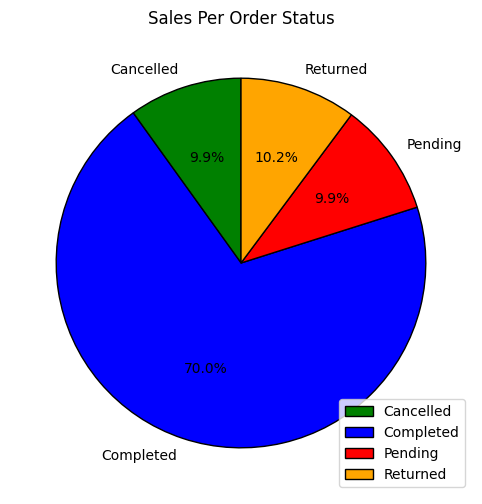

In [34]:
# Sales Analysis by Order Status

Sales_per_order_status=Order_full.groupby("Order_Status")["Amount_Paid"].sum()

plt.figure(figsize=(10,6))
plt.pie(Sales_per_order_status,labels=Sales_per_order_status.index,autopct="%1.1f%%",startangle=90,
        colors=["green","blue","red","orange"], wedgeprops={"edgecolor":"black"})

plt.title("Sales Per Order Status")
plt.legend()
plt.show()

# Findings & Observations:
# Majority of sales (70%) come from completed orders, showing strong fulfillment performance.
# Cancelled and pending orders each account for ~10%, indicating moderate inefficiency.
# Returned orders also form ~10%, reflecting customer dissatisfaction or product issues.
# Efforts to reduce cancellations/returns can further boost revenue and customer trust.

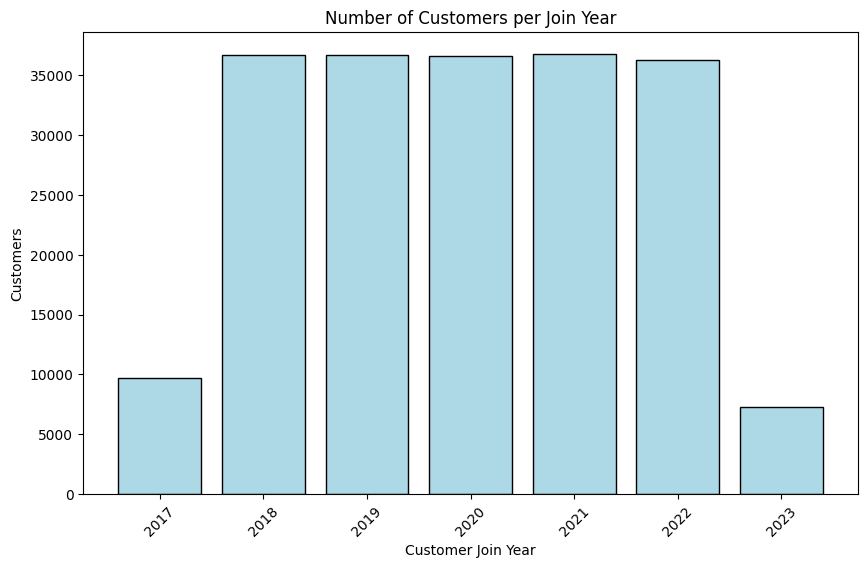

In [35]:
# Customer Growth by Join Year

Customer_per_join_year=Order_full.groupby("Customer_Join_Year")["Customer_Id"].count()

plt.figure(figsize=(10,6))
plt.bar(Customer_per_join_year.index,Customer_per_join_year,color="lightblue",edgecolor="black")
plt.xlabel("Customer Join Year")
plt.ylabel("Customers")
plt.title("Number of Customers per Join Year")
plt.xticks(rotation=45)
plt.show()

# Findings & Observations:
# Customer sign-ups were very low in 2017 and 2023 compared to other years.
# Peak growth occurred between 2018–2022 with ~36K–37K customers joining each year.
# The trend shows a stable customer base during these years, indicating strong retention.
# Recent decline in 2023 suggests possible slowdown in acquisition, requiring marketing focus.

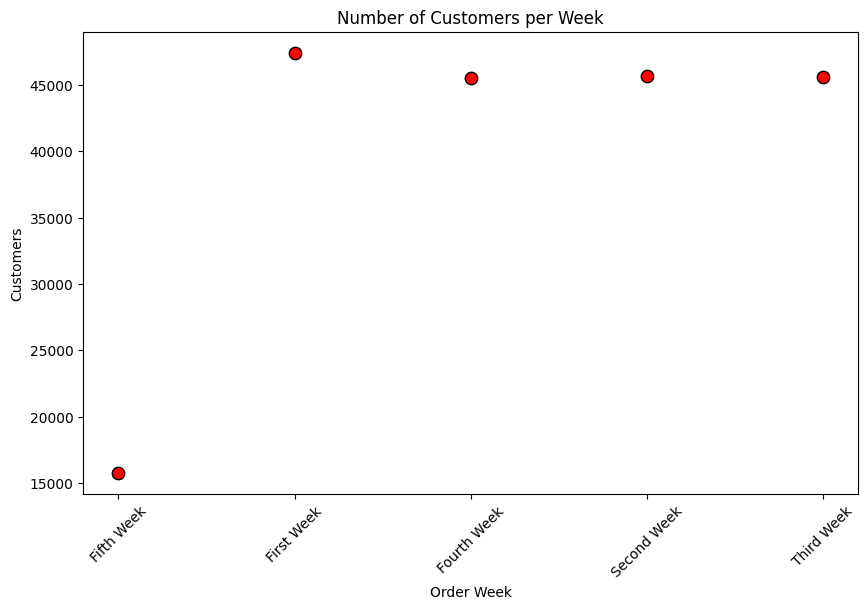

In [36]:
# Customer Orders per Week

Customer_per_week=Order_full.groupby("Order_Week")["Order_Id"].count()

plt.figure(figsize=(10,6))
plt.scatter(Customer_per_week.index,Customer_per_week,color="red",s=80,edgecolor="black")
plt.xlabel("Order Week")
plt.ylabel("Customers")
plt.title("Number of Customers per Week")
plt.xticks(rotation=45)
plt.show()

# Findings & Observations:
# The first week recorded the highest customer count (~47K).
# Weeks 2–4 show stable engagement, maintaining ~45K customers.
# The fifth week has a sharp drop (~16K), likely due to shorter weeks or lower activity.
# Consistent weekly demand highlights steady customer retention except for the last week.

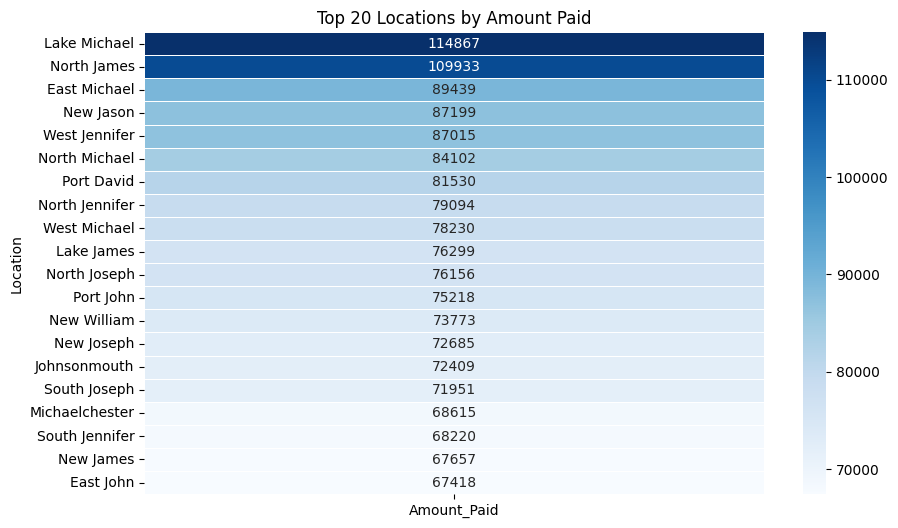

In [37]:
# Top 20 Locations by Amount Paid

pivot_table = Order_full.pivot_table(index="Location", values="Amount_Paid", aggfunc="sum")
table = pivot_table.sort_values("Amount_Paid", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.heatmap(table, annot=True, cmap="Blues", linewidths=0.5, fmt=".0f")

plt.ylabel("Location")
plt.xlabel("")
plt.title("Top 20 Locations by Amount Paid")
plt.show()

# Findings & Observations:
# Lake Michael leads with the highest payment (~114K), followed by North James (~110K).
# The top 5 locations alone contribute a major share of revenue, each exceeding 85K.
# Mid-tier locations like Port David and North Jennifer show balanced contributions (~79K–81K).
# Bottom of the list (East John, New James) still maintains strong payments (~67K),
# showing overall high-value customers across locations.

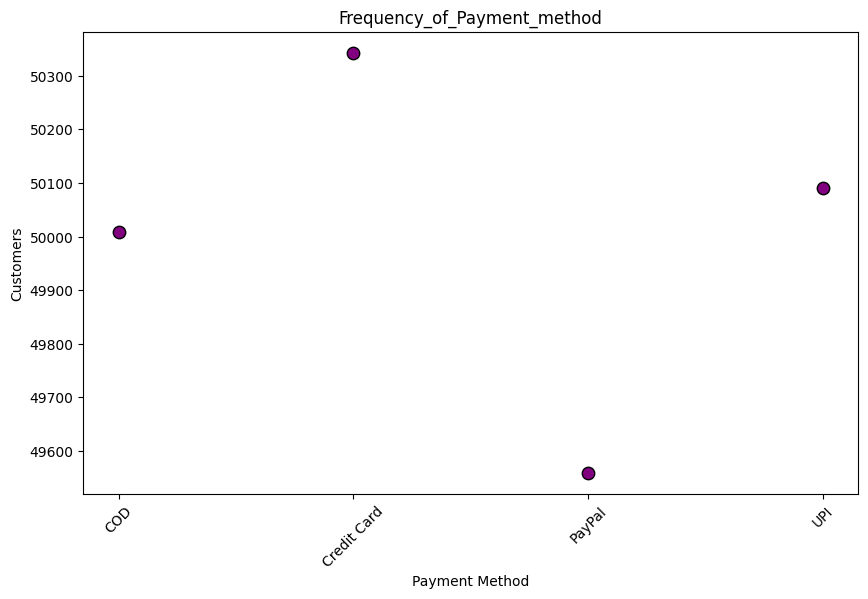

In [38]:
# Frequency of Payment Method

Frequency_of_Payment_method=Order_full.groupby("Payment_Method")["Order_Id"].count()

plt.figure(figsize=(10,6))
plt.scatter(Frequency_of_Payment_method.index,Frequency_of_Payment_method,color="purple",s=80,edgecolor="black")
plt.xlabel("Payment Method")
plt.ylabel("Customers")
plt.title("Frequency_of_Payment_method")
plt.xticks(rotation=45)
plt.show()

# Findings & Observations:
# Credit Card is the most frequently used payment method, slightly ahead of UPI.
# COD also has a strong customer base, showing trust in traditional payment modes.
# PayPal is the least used method, indicating lower adoption compared to others.
# Overall, customers prefer digital transactions (Credit Card & UPI) over COD/PayPal.

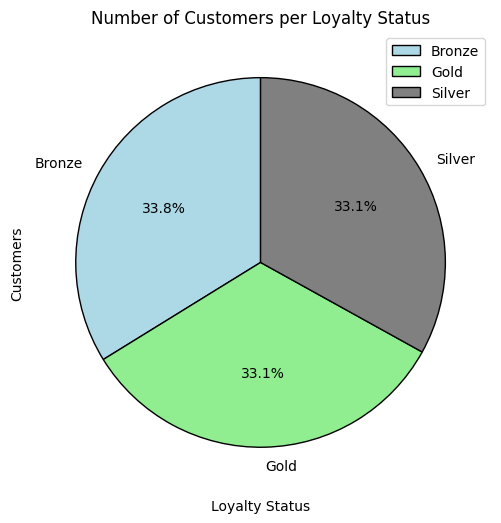

In [39]:
# Number of Customers per Loyalty Status

Customer_per_Loyalty_Status=Order_full.groupby("Loyalty_Status")["Customer_Id"].count()

plt.figure(figsize=(10,6))
plt.pie(Customer_per_Loyalty_Status,labels=Customer_per_Loyalty_Status.index,autopct="%1.1f%%",startangle=90,
        colors=["lightblue","lightgreen","grey"], wedgeprops={"edgecolor":"black"})
plt.xlabel("Loyalty Status")
plt.ylabel("Customers")
plt.title("Number of Customers per Loyalty Status")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Findings & Observations:
# Bronze customers form the largest group (33.8%), slightly ahead of Gold and Silver.
# Gold (33.1%) and Silver (33.1%) are nearly equal, showing balanced engagement.
# The distribution suggests healthy participation across all loyalty tiers.
# Bronze being highest may indicate many new or entry-level customers in the program.

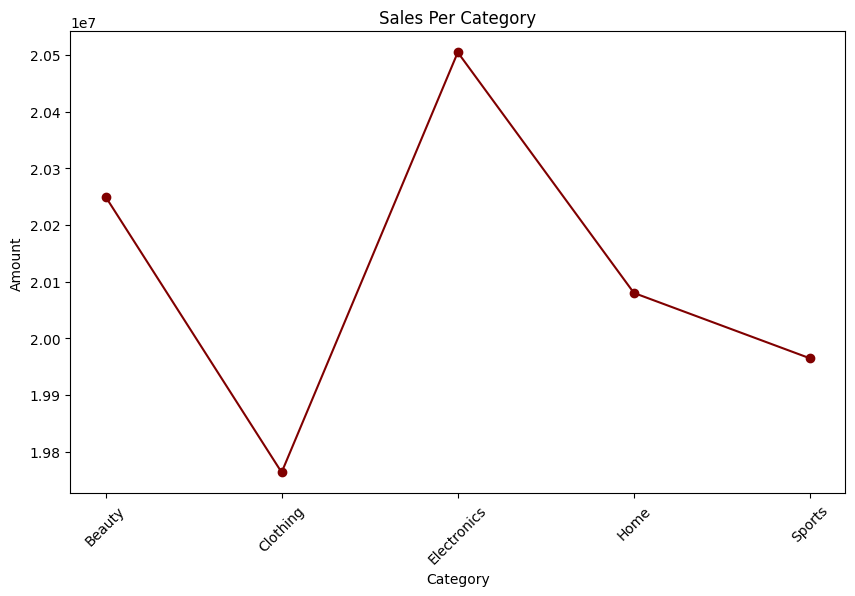

In [45]:
# Sales per Category

Sales_per_category=Order_full.groupby("Category")["Amount_Paid"].sum()

plt.figure(figsize=(10,6))
plt.plot(Sales_per_category.index,Sales_per_category,color="maroon",marker="o")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.title("Sales Per Category")
plt.xticks(rotation=45)
plt.show()

# Findings & Observations:
# Electronics generated the highest sales, showing it as the most profitable category.
# Beauty and Home products also contributed strongly, following Electronics.
# Sports and Clothing categories had comparatively lower sales.
# The trend highlights customer preference towards tech and lifestyle-related products.

In [41]:
# chi-Square

# Contingency table
contingency = pd.crosstab(Order_full["Payment_Method"], Order_full["Payment_Status"])

# Chi-square test
chi2, p_val, dof, expected = stats.chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2)
print("P-Value:", p_val)
print("Degrees of Freedom:", dof)

# Interpretation + Storytelling
if p_val < 0.05:
    print("\nFindings & Observation:")
    print("- The p-value is less than 0.05, so we reject the null hypothesis.")
    print("- This means there is a statistically significant relationship between Payment Method and Payment Status.")
    print("- In simple terms: the way people pay (Cash, Card, UPI, etc.) is associated with whether their payment was successful, pending, or failed.")
else:
    print("\nFindings & Observation:")
    print("- The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("- This means there is no strong evidence of a relationship between Payment Method and Payment Status.")
    print("- In simple terms: the choice of payment method does not significantly impact payment success or failure.")

Chi-Square Statistic: 7.01938187240287
P-Value: 0.3190584948659888
Degrees of Freedom: 6

Findings & Observation:
- The p-value is greater than 0.05, so we fail to reject the null hypothesis.
- This means there is no strong evidence of a relationship between Payment Method and Payment Status.
- In simple terms: the choice of payment method does not significantly impact payment success or failure.


In [42]:
# chi-Square

# Group sales by month
monthly_sales = Order_full.groupby("Order_Month")["Total_Amount"].sum()

# Expected frequency = uniform distribution (equal sales in each month)
expected = [monthly_sales.sum() / len(monthly_sales)] * len(monthly_sales)

# Chi-square goodness-of-fit test
chi2_stat, p_value = stats.chisquare(f_obs=monthly_sales, f_exp=expected)

print("Chi-square Statistic:", chi2_stat)
print("p-value:", p_value)

# Interpretation + Findings
if p_value < 0.05:
    print("\nReject H0 → Sales show significant seasonal variation.")
    print("This means sales are not evenly distributed across months. Some months perform significantly better or worse.")
    print("Business Insight: Focus marketing/stocking strategies around high-performing months to maximize revenue.")
else:
    print("\nFail to Reject H0 → No strong evidence of seasonal effect.")
    print("Sales appear to be evenly distributed across months.")
    print("Business Insight: Demand is stable, so inventory and staffing can remain consistent year-round.")

Chi-square Statistic: 618700.9547652468
p-value: 0.0

Reject H0 → Sales show significant seasonal variation.
This means sales are not evenly distributed across months. Some months perform significantly better or worse.
Business Insight: Focus marketing/stocking strategies around high-performing months to maximize revenue.


In [43]:
# T-Test

# Split ages based on gender
male_age = Order_full[Order_full["Gender"] == "Male"]["Age"].dropna()
female_age = Order_full[Order_full["Gender"] == "Female"]["Age"].dropna()

# Independent t-test
t_stat, p_val = stats.ttest_ind(male_age, female_age, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

# Interpretation + Storytelling
if p_val < 0.05:
    print("\nReject H0 → There is a significant difference in average age between Male and Female customers.")
    print("This means gender plays a role in the age distribution of customers.")
    print("Observation: One group (Male/Female) tends to be older or younger on average compared to the other.")
else:
    print("\nFail to Reject H0 → No significant difference in average age between Male and Female customers.")
    print("This means customer age distribution is fairly similar across genders.")
    print("Observation: Age is not strongly influenced by gender in this dataset.")


T-Statistic: -1.5978224125100489
P-Value: 0.110084086074152

Fail to Reject H0 → No significant difference in average age between Male and Female customers.
This means customer age distribution is fairly similar across genders.
Observation: Age is not strongly influenced by gender in this dataset.
